## Applying Neural Networks on Material Science dataset
The given dataset contains certain microstructurual properties like Yield Strength, Oxygen content, percentage of reheated microstructure and fraction of acicular ferrite. Since the number of features is just 4 and the dataset as only 59 datapoints, it is tough to obtain very high accuracy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('/Users/chiragbhattad/Downloads/DDP/Charpy Analysis/dataset.csv')

In [4]:
features = ['YS', 'O2', 'Reheated', 'ac_ferr']
target = ['T27J']
training_data = data[0:40]
test_data = data[40:60]
X_train = training_data[features]
Y_train = training_data[target]
X_test = test_data[features]
Y_test = test_data[target]

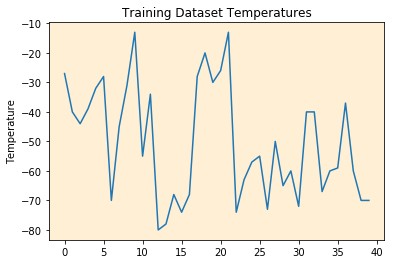

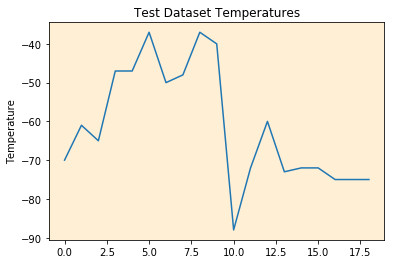

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('#FFEFD5')
plt.plot(range(40), Y_train, label = "Train Data")
plt.title('Training Dataset Temperatures')
plt.ylabel('Temperature')
plt.show()
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('#FFEFD5')
plt.plot(range(19), Y_test, label = "Test Data")
plt.title('Test Dataset Temperatures')
plt.ylabel('Temperature')
plt.show()

In [6]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
pred = regr.predict(X_test)

In [8]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 1.80856913e-03  5.63436380e+02  3.87300599e-02 -2.06848292e-01]]


In [22]:
print('Mean Squared Error: ', mean_squared_error(Y_test, pred))
print('Variance score:', r2_score(Y_test, pred))

Mean Squared Error:  124.57839395596007
Variance score: 0.43585137336484125


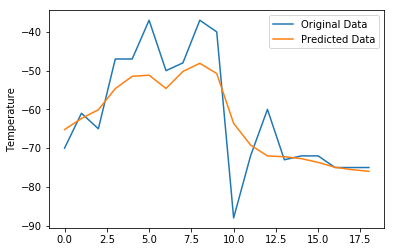

In [11]:
plt.plot(range(19), Y_test, label = "Original Data")
plt.plot(range(19), pred, label = "Predicted Data")
plt.legend(loc='best')
plt.ylabel('Temperature')
plt.show()

In [12]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(training_data[features].as_matrix())

In [14]:
Y_train = scaler.fit_transform(training_data[target].as_matrix())

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [15]:
X_test = scaler.fit_transform(test_data[features].as_matrix())
Y_test = scaler.fit_transform(test_data[target].as_matrix())

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [16]:
Y_test

array([[0.35294118],
       [0.52941176],
       [0.45098039],
       [0.80392157],
       [0.80392157],
       [1.        ],
       [0.74509804],
       [0.78431373],
       [1.        ],
       [0.94117647],
       [0.        ],
       [0.31372549],
       [0.54901961],
       [0.29411765],
       [0.31372549],
       [0.31372549],
       [0.25490196],
       [0.25490196],
       [0.25490196]])

In [17]:
def neural_network(X_data, input_dim):
    W_1 = tf.Variable(tf.random_uniform([input_dim,10]))
    b_1 = tf.Variable(tf.zeros([10]))
    layer_1 = tf.add(tf.matmul(X_data, W_1), b_1)
    layer_1 = tf.nn.relu(layer_1)
    
    W_2 = tf.Variable(tf.random_uniform([10,10]))
    b_2 = tf.Variable(tf.zeros([10]))
    layer_2 = tf.add(tf.matmul(layer_1, W_2), b_2)
    layer_2 = tf.nn.relu(layer_2)
    
    W_0 = tf.Variable(tf.random_uniform([10,1]))
    b_0 = tf.Variable(tf.zeros([1]))
    output = tf.add(tf.matmul(layer_2, W_0), b_0)
    
    return output

In [18]:
xs = tf.placeholder("float")
ys = tf.placeholder("float")

output = neural_network(xs, 4)
cost = tf.reduce_mean(tf.square(output-ys))
train = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

In [19]:
c_t = []
c_test = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    for i in range(100):
        for j in range(X_train.shape[0]):
            sess.run([cost,train], feed_dict = {xs:X_train[j,:].reshape(1,4), ys:Y_train[j]})
        c_t.append(sess.run(cost, feed_dict={xs:X_train, ys: Y_train}))
        c_test.append(sess.run(cost, feed_dict={xs: X_test, ys: Y_test}))
        print('Epoch: ', i, 'Cost: ', c_t[i])
    
    pred = sess.run(output, feed_dict = {xs:X_test})
    print('Cost: ', sess.run(cost, feed_dict={xs: X_test, ys: pred}))
    
print(Y_test)

Epoch:  0 Cost:  0.35653448
Epoch:  1 Cost:  0.22414963
Epoch:  2 Cost:  0.20218226
Epoch:  3 Cost:  0.1878252
Epoch:  4 Cost:  0.17551883
Epoch:  5 Cost:  0.164647
Epoch:  6 Cost:  0.15494794
Epoch:  7 Cost:  0.14633444
Epoch:  8 Cost:  0.13865438
Epoch:  9 Cost:  0.13174787
Epoch:  10 Cost:  0.12543586
Epoch:  11 Cost:  0.11961486
Epoch:  12 Cost:  0.11427041
Epoch:  13 Cost:  0.109419905
Epoch:  14 Cost:  0.10503054
Epoch:  15 Cost:  0.101048216
Epoch:  16 Cost:  0.09742451
Epoch:  17 Cost:  0.09411806
Epoch:  18 Cost:  0.09109314
Epoch:  19 Cost:  0.088316895
Epoch:  20 Cost:  0.0857572
Epoch:  21 Cost:  0.08339765
Epoch:  22 Cost:  0.081212185
Epoch:  23 Cost:  0.07919202
Epoch:  24 Cost:  0.07732125
Epoch:  25 Cost:  0.07558523
Epoch:  26 Cost:  0.07397103
Epoch:  27 Cost:  0.072467096
Epoch:  28 Cost:  0.07106316
Epoch:  29 Cost:  0.06975009
Epoch:  30 Cost:  0.068519846
Epoch:  31 Cost:  0.06736492
Epoch:  32 Cost:  0.06627885
Epoch:  33 Cost:  0.0652558
Epoch:  34 Cost:  0.064

In [20]:
    Y_test = Y_test.reshape(-1,1)
    Y_test = scaler.inverse_transform(Y_test)
    pred = pred.reshape(-1,1)
    pred = scaler.inverse_transform(pred)
    
    Y_test

array([[-70.],
       [-61.],
       [-65.],
       [-47.],
       [-47.],
       [-37.],
       [-50.],
       [-48.],
       [-37.],
       [-40.],
       [-88.],
       [-72.],
       [-60.],
       [-73.],
       [-72.],
       [-72.],
       [-75.],
       [-75.],
       [-75.]])

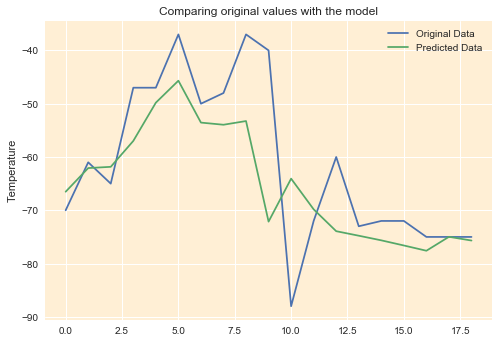

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('#FFEFD5')
plt.plot(range(19), Y_test, label = "Original Data")
plt.plot(range(19), pred, label = "Predicted Data")
plt.title('Comparing original values with the model')
plt.legend(loc='best')
plt.ylabel('Temperature')
plt.show()